<a href="https://colab.research.google.com/github/ppn101/Projects/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing all the required libraries and functions into the program.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
#Importing the file and converting it into a dataframe.
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv")

In [4]:
#Returning the first 3 rows in the dataframe.
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [5]:
#Getting a statistical summary of the entire dataframe.
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
#Getting an idea of the number of rows and columns in the dataframe.
df.shape

(200, 5)

In [7]:
#Checking the datatypes of the feature columns in the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
#Checking if any column in the dataframe contains any null value.
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
#Performing label encoding in order to convert text data into numerical data.
df["Gender"].replace(to_replace = "Female", value = 0, inplace = True)
df["Gender"].replace(to_replace = "Male", value = 1, inplace = True)

In [10]:
#Standardizing column names by following specefic naming conventions.
df.rename(columns = {'Spending Score (1-100)': 'spending_score', 'Annual Income (k$)': 'annual_income', 'Gender': 'sex', 'Age': 'age'}, inplace = True)

In [11]:
#Removing columns with low predictive power from the dataframe.
df.drop("CustomerID", axis = 1, inplace = True)

In [12]:
df.head(3)

,sex,age,annual_income,spending_score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6


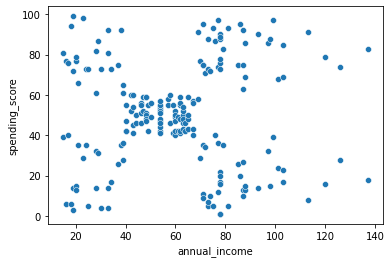

In [13]:
#Creating a scatterplot to visualize and to get a basic idea on the clustering of groups using two columns from the dataframe.
sns.scatterplot(x = 'annual_income', y = 'spending_score', data = df)

In [14]:
#Creating a new variable to only contain the values present in the dataframe which have a high predictive index. Significance of annual_income(2) and spending_score(3) is much higher compared to sex(0) and age(1) hence the latter ones are removed from consideration set.
df_new = df.iloc[:, [2,3]].values

In [15]:
#Performing calculation for wcss ( within cluster sum of square ) in order to determine optimal k using elbow method.
wcss = []
for i in range(1,15):
  model = KMeans(n_clusters= i, init = 'k-means++')
  model.fit(df_new)
  wcss.append(model.inertia_)

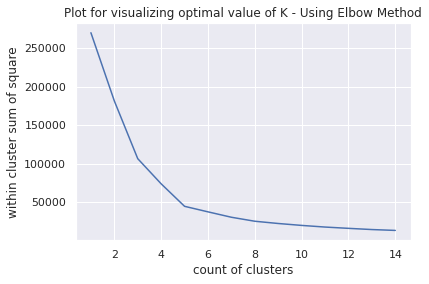

In [16]:
#Plotting the elbow graph to visualize the optimal value of K
sns.set()
plt.plot(range(1,15), wcss)
plt.title('Plot for visualizing optimal value of K - Using Elbow Method')
plt.ylabel('within cluster sum of square')
plt.xlabel('count of clusters')
plt.show()

In [17]:
#Training the KMeans model on the given dataframe.
model = KMeans(n_clusters = 5, init = 'k-means++', random_state= 1)
model.fit(df_new)
Y = model.fit_predict(df_new)

In [18]:
#Now i will try to get a numpy like representation of the given dataframe.
model.labels_

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

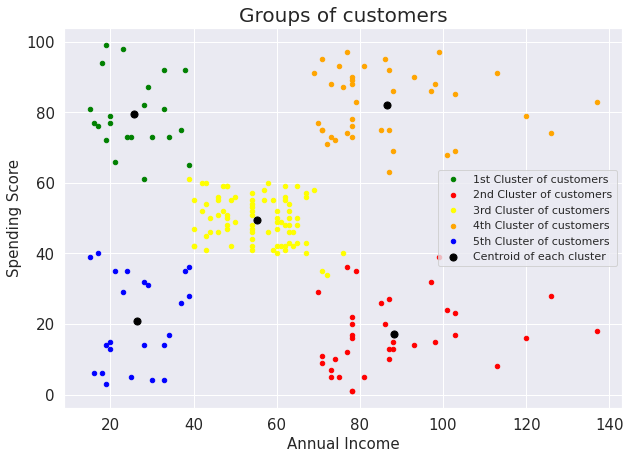

In [44]:
#Now, i will be plotting the centroids and the clusters in a single plot to visualize the cluster of groups formed by the KMeans model
plt.figure(figsize = (10,7))
plt.scatter(df_new[Y==0,0], df_new[Y==0,1], s = 20, c = 'green', label = '1st Cluster of customers')
plt.scatter(df_new[Y==1,0], df_new[Y==1,1], s = 20, c = 'red', label = '2nd Cluster of customers')
plt.scatter(df_new[Y==2,0], df_new[Y==2,1], s = 20, c = 'yellow', label = '3rd Cluster of customers')
plt.scatter(df_new[Y==3,0], df_new[Y==3,1], s = 20, c = 'orange', label = '4th Cluster of customers')
plt.scatter(df_new[Y==4,0], df_new[Y==4,1], s = 20, c = 'blue', label = '5th Cluster of customers')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroid of each cluster')
plt.title('Groups of customers', fontsize = 20)
plt.ylabel('Spending Score', fontsize = 15)
plt.xlabel('Annual Income', fontsize = 15)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.legend()
plt.show()